# Free Style and Show-off in ANNs
> Here you are allowed to use every thing you've learnt and search for everything you didn't

## Normal Task :-
* Build Your Own  Artificial Neural Network in Keras  
* First Perform EDA
* Second Do Your Modeling Routine
* Third Visualize in Fancy ways
* Fourth Save Your Model and Prepare your Inference
> Use Bike Data

Good Luck Buddy!

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/E2Edata/Bike-Sharing-Dataset')  # Fix This if your file is in a Certain Directory in Your Drive

Mounted at /content/drive/


In [ ]:
rides =pd.read_csv('hour.csv')
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<AxesSubplot:xlabel='dteday'>

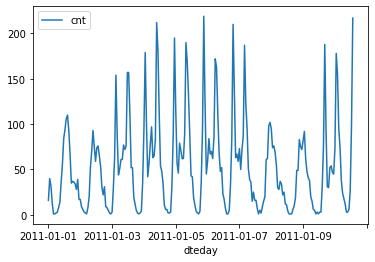

In [ ]:
# A Pandas Plot
rides[:24*10].plot(x='dteday', y='cnt')

In [ ]:
None    # Some times you need to tell which columns you need to get dummies  df = pd.get_dummies(df, columns=dummy_cols)
rides = pd.get_dummies(rides,drop_first=True,columns=[ 'season'	,	'mnth'	, 'hr' , 	'weekday'	, 'weathersit'])
rides.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0,3,...,0,0,0,0,0,0,1,0,0,0
1,2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,8,...,0,0,0,0,0,0,1,0,0,0
2,3,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,5,...,0,0,0,0,0,0,1,0,0,0
3,4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,3,...,0,0,0,0,0,0,1,0,0,0
4,5,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
rides.drop(['instant'],axis = 1, inplace= True)
rides.drop(['dteday'],axis = 1, inplace= True)
rides.drop(['casual'],axis = 1, inplace= True)
rides.drop(['registered'],axis = 1, inplace= True)

In [ ]:
quant_features = ["cnt",'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = rides[each].mean(), rides[each].std()
    scaled_features[each] = [mean, std]
    # STANDARDIZE
    rides.loc[:, each] = (rides[each] - mean ) /std

In [ ]:
# Save the last 21 days
test_data = rides[-21*24:] #  For Testing
data = rides[:-21*24]      # For Training

# Separate the data into features and targets
target_fields = ['cnt']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [ ]:
# Hold out the last 60 days of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [ ]:
train_features.shape

(15435, 53)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()  #define model
model.add(Dense(53, input_dim=53, activation="linear"))
model.add(Dense(8, activation="linear"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"]) #compile model

In [ ]:
model.fit(train_features, train_targets, epochs=150, batch_size=10)  #training
_, accuracy = model.evaluate(train_features, train_targets)    #testing
print("Model accuracy: %.2f"% (accuracy*100))

Epoch 1/150
1544/1544 [==============================] - 6s 3ms/step - loss: nan - accuracy: 6.4788e-05
Epoch 2/150
1544/1544 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/150
1544/1544 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/150
1544/1544 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/150
1544/1544 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/150
 122/1544 [=>............................] - ETA: 8s - loss: nan - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

## Master Task :-
* Build Your Own  Artificial Neural Network in Tensorflow  
* First Perform EDA
* Second Do Your Modeling Routine
* Third Visualize in Fancy ways
* Fourth Save Your Model and Prepare your Inference
> Use Bike Data